<a href="https://colab.research.google.com/github/kathrynpav/Microsoft-Excel-Projects/blob/master/OLS_apple_for_25_days.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# OLS is ran for window of 25 days
# x=day 0,day 1...
# Y= close price


each day prediction is based on the preivos window perfromance.if we have the data for 600 days ,then regression is ran for 600 days

In [ ]:
import yfinance as yf
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt

In [ ]:
df=yf.download('AAPL',start='2019-12-31')
df

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-12-31,72.482498,73.419998,72.379997,73.412498,71.520821,100805600
2020-01-02,74.059998,75.150002,73.797501,75.087502,73.152649,135480400
2020-01-03,74.287498,75.144997,74.125000,74.357498,72.441460,146322800
2020-01-06,73.447502,74.989998,73.187500,74.949997,73.018684,118387200
2020-01-07,74.959999,75.224998,74.370003,74.597504,72.675270,108872000
...,...,...,...,...,...,...
2024-01-30,190.940002,191.800003,187.470001,188.039993,188.039993,55859400
2024-01-31,187.039993,187.100006,184.350006,184.399994,184.399994,55467800
2024-02-01,183.990005,186.949997,183.820007,186.860001,186.860001,64885400


In [ ]:
window =25
# for the first 25 rows regression is being run
test_df=df[:window]
test_df.shape


(25, 6)

In [ ]:
test_df

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-12-31,72.482498,73.419998,72.379997,73.412498,71.520821,100805600
2020-01-02,74.059998,75.150002,73.797501,75.087502,73.152649,135480400
2020-01-03,74.287498,75.144997,74.125000,74.357498,72.441460,146322800
2020-01-06,73.447502,74.989998,73.187500,74.949997,73.018684,118387200
2020-01-07,74.959999,75.224998,74.370003,74.597504,72.675270,108872000
2020-01-08,74.290001,76.110001,74.290001,75.797501,73.844368,132079200
2020-01-09,76.809998,77.607498,76.550003,77.407501,75.412872,170108400
2020-01-10,77.650002,78.167503,77.062500,77.582497,75.583351,140644800
2020-01-13,77.910004,79.267502,77.787498,79.239998,77.198158,121532000


In [ ]:
y_=test_df.Close
y_

Date
2019-12-31    73.412498
2020-01-02    75.087502
2020-01-03    74.357498
2020-01-06    74.949997
2020-01-07    74.597504
2020-01-08    75.797501
2020-01-09    77.407501
2020-01-10    77.582497
2020-01-13    79.239998
2020-01-14    78.169998
2020-01-15    77.834999
2020-01-16    78.809998
2020-01-17    79.682503
2020-01-21    79.142502
2020-01-22    79.425003
2020-01-23    79.807503
2020-01-24    79.577499
2020-01-27    77.237503
2020-01-28    79.422501
2020-01-29    81.084999
2020-01-30    80.967499
2020-01-31    77.377502
2020-02-03    77.165001
2020-02-04    79.712502
2020-02-05    80.362503
Name: Close, dtype: float64

In [ ]:
# x has to be in the format of 0,1,2--rather than date format
pd.Series(range(len(test_df.index)))

0      0
1      1
2      2
3      3
4      4
5      5
6      6
7      7
8      8
9      9
10    10
11    11
12    12
13    13
14    14
15    15
16    16
17    17
18    18
19    19
20    20
21    21
22    22
23    23
24    24
dtype: int64

In [ ]:
X_= pd.Series(range(len(test_df.index))).values
X_

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24])

In [ ]:
model = sm.OLS(y_,sm.add_constant(X_)).fit()
model.predict()
model.params
# intercept =75.2
#slope= 0.22
# equation=intercept+24*slope
#predcition =75.2+24*0.22
# 24 means window sixe is 25, but last value is excluded

const    75.230253
x1        0.224854
dtype: float64

In [ ]:
model.predict()

array([75.2302529 , 75.45510685, 75.67996081, 75.90481476, 76.12966872,
       76.35452268, 76.57937663, 76.80423059, 77.02908454, 77.2539385 ,
       77.47879245, 77.70364641, 77.92850037, 78.15335432, 78.37820828,
       78.60306223, 78.82791619, 79.05277015, 79.2776241 , 79.50247806,
       79.72733201, 79.95218597, 80.17703992, 80.40189388, 80.62674784])

In [ ]:
model.predict()[-1]

80.62674783559947

In [ ]:
 75.230253+24*0.224854

80.626749

Nw  b nees to do the abv for all the row of the data frame by taking 25 rows together.0-24,1-25,   2-26,    3-27.......recursive


In [ ]:
lsma_arr= []
dates_arr =[]
for i in range(len(df)-24):
  input_reg=df[i:25+i] # 0-24,1-25,2-26...
  X=pd.Series(range(len(input_reg.index))).values # conv of dates to 0,1,..
  Y=  input_reg.Close
  model=sm.OLS(Y,sm.add_constant(X)).fit()
  pred=model.predict()[-1] # takes the last value of the ressilt from the loop
  lsma_arr.append(pred)
  dates_arr.append(input_reg.iloc[-1].name)# date where predcition is made and scressnfor the last row ,name gives date of the row




In [ ]:
lsma_arr

[80.62674783559947,
 80.77416269155644,
 80.7875011502779,
 80.75431586632358,
 80.63974578857417,
 80.737346496582,
 80.77663862961984,
 80.89771608792813,
 80.77316962608921,
 80.93535381610572,
 80.8714300537109,
 80.48985252967245,
 79.62184431809641,
 78.48231320894678,
 77.54256697434643,
 75.95956683819105,
 74.50308967003454,
 74.09333582951469,
 73.18368265005253,
 72.99995941162109,
 72.61359849196211,
 72.1437215717022,
 70.60539933424728,
 69.87265324519225,
 69.02399169921874,
 67.30229965209958,
 66.94574589655947,
 65.24673093355614,
 64.15912319476783,
 62.957915285550584,
 62.005592522254375,
 60.61113123967094,
 59.255392960768454,
 58.86121638371391,
 58.674608905498765,
 59.088816575270414,
 59.09747048011188,
 59.22592414269077,
 59.23286212627702,
 58.90485447810244,
 58.46516937255855,
 57.955584599421556,
 58.82253070537861,
 59.46895359919619,
 60.703030583308255,
 61.897699655386084,
 63.27036116379957,
 64.7423917330228,
 66.45088374211238,
 68.04846066988428

In [ ]:
dates_arr

[Timestamp('2020-02-05 00:00:00'),
 Timestamp('2020-02-06 00:00:00'),
 Timestamp('2020-02-07 00:00:00'),
 Timestamp('2020-02-10 00:00:00'),
 Timestamp('2020-02-11 00:00:00'),
 Timestamp('2020-02-12 00:00:00'),
 Timestamp('2020-02-13 00:00:00'),
 Timestamp('2020-02-14 00:00:00'),
 Timestamp('2020-02-18 00:00:00'),
 Timestamp('2020-02-19 00:00:00'),
 Timestamp('2020-02-20 00:00:00'),
 Timestamp('2020-02-21 00:00:00'),
 Timestamp('2020-02-24 00:00:00'),
 Timestamp('2020-02-25 00:00:00'),
 Timestamp('2020-02-26 00:00:00'),
 Timestamp('2020-02-27 00:00:00'),
 Timestamp('2020-02-28 00:00:00'),
 Timestamp('2020-03-02 00:00:00'),
 Timestamp('2020-03-03 00:00:00'),
 Timestamp('2020-03-04 00:00:00'),
 Timestamp('2020-03-05 00:00:00'),
 Timestamp('2020-03-06 00:00:00'),
 Timestamp('2020-03-09 00:00:00'),
 Timestamp('2020-03-10 00:00:00'),
 Timestamp('2020-03-11 00:00:00'),
 Timestamp('2020-03-12 00:00:00'),
 Timestamp('2020-03-13 00:00:00'),
 Timestamp('2020-03-16 00:00:00'),
 Timestamp('2020-03-

In [ ]:
lsma_df=pd.DataFrame({'LSMA':lsma_arr},index=dates_arr)
lsma_df

,LSMA
2020-02-05,80.626748
2020-02-06,80.774163
2020-02-07,80.787501
2020-02-10,80.754316
2020-02-11,80.639746
...,...
2024-01-30,190.086673
2024-01-31,189.772950
2024-02-01,189.871043
2024-02-02,189.881998


In [ ]:
# merging two data frames together
all_df = pd.concat([lsma_df,df],axis=1)
all_df

,LSMA,Open,High,Low,Close,Adj Close,Volume
2019-12-31,NaN,72.482498,73.419998,72.379997,73.412498,71.520821,100805600
2020-01-02,NaN,74.059998,75.150002,73.797501,75.087502,73.152649,135480400
2020-01-03,NaN,74.287498,75.144997,74.125000,74.357498,72.441460,146322800
2020-01-06,NaN,73.447502,74.989998,73.187500,74.949997,73.018684,118387200
2020-01-07,NaN,74.959999,75.224998,74.370003,74.597504,72.675270,108872000
...,...,...,...,...,...,...,...
2024-01-30,190.086673,190.940002,191.800003,187.470001,188.039993,188.039993,55859400
2024-01-31,189.772950,187.039993,187.100006,184.350006,184.399994,184.399994,55467800
2024-02-01,189.871043,183.990005,186.949997,183.820007,186.860001,186.860001,64885400
2024-02-02,189.881998,179.860001,187.330002,179.250000,185.850006,185.850006,102518000


In [ ]:
all_df.dropna(inplace=True)
all_df

,LSMA,Open,High,Low,Close,Adj Close,Volume
2020-02-05,80.626748,80.879997,81.190002,79.737503,80.362503,78.291725,118826800
2020-02-06,80.774163,80.642502,81.305000,80.065002,81.302498,79.207512,105425600
2020-02-07,80.787501,80.592499,80.849998,79.500000,80.007500,78.130852,117684000
2020-02-10,80.754316,78.544998,80.387497,78.462502,80.387497,78.501953,109348800
2020-02-11,80.639746,80.900002,80.974998,79.677498,79.902496,78.028305,94323200
...,...,...,...,...,...,...,...
2024-01-30,190.086673,190.940002,191.800003,187.470001,188.039993,188.039993,55859400
2024-01-31,189.772950,187.039993,187.100006,184.350006,184.399994,184.399994,55467800
2024-02-01,189.871043,183.990005,186.949997,183.820007,186.860001,186.860001,64885400
2024-02-02,189.881998,179.860001,187.330002,179.250000,185.850006,185.850006,102518000


In [ ]:
# stratergy creation
all_df['signal_buy']=all_df.Close<all_df.LSMA
all_df['signal_sell']=all_df.Close>all_df.LSMA
all_df

,LSMA,Open,High,Low,Close,Adj Close,Volume,signal_buy,signal_sell
2020-02-05,80.626748,80.879997,81.190002,79.737503,80.362503,78.291725,118826800,True,False
2020-02-06,80.774163,80.642502,81.305000,80.065002,81.302498,79.207512,105425600,False,True
2020-02-07,80.787501,80.592499,80.849998,79.500000,80.007500,78.130852,117684000,True,False
2020-02-10,80.754316,78.544998,80.387497,78.462502,80.387497,78.501953,109348800,True,False
2020-02-11,80.639746,80.900002,80.974998,79.677498,79.902496,78.028305,94323200,True,False
...,...,...,...,...,...,...,...,...,...
2024-01-30,190.086673,190.940002,191.800003,187.470001,188.039993,188.039993,55859400,True,False
2024-01-31,189.772950,187.039993,187.100006,184.350006,184.399994,184.399994,55467800,True,False
2024-02-01,189.871043,183.990005,186.949997,183.820007,186.860001,186.860001,64885400,True,False
2024-02-02,189.881998,179.860001,187.330002,179.250000,185.850006,185.850006,102518000,True,False


In [ ]:
# new column called shifted open is created because next day only buy happen

In [ ]:
all_df['shifted_open']=all_df.Open.shift(-1)
all_df

,LSMA,Open,High,Low,Close,Adj Close,Volume,signal_buy,signal_sell,shifted_open
2020-02-05,80.626748,80.879997,81.190002,79.737503,80.362503,78.291725,118826800,True,False,80.642502
2020-02-06,80.774163,80.642502,81.305000,80.065002,81.302498,79.207512,105425600,False,True,80.592499
2020-02-07,80.787501,80.592499,80.849998,79.500000,80.007500,78.130852,117684000,True,False,78.544998
2020-02-10,80.754316,78.544998,80.387497,78.462502,80.387497,78.501953,109348800,True,False,80.900002
2020-02-11,80.639746,80.900002,80.974998,79.677498,79.902496,78.028305,94323200,True,False,80.367500
...,...,...,...,...,...,...,...,...,...,...
2024-01-30,190.086673,190.940002,191.800003,187.470001,188.039993,188.039993,55859400,True,False,187.039993
2024-01-31,189.772950,187.039993,187.100006,184.350006,184.399994,184.399994,55467800,True,False,183.990005
2024-02-01,189.871043,183.990005,186.949997,183.820007,186.860001,186.860001,64885400,True,False,179.860001
2024-02-02,189.881998,179.860001,187.330002,179.250000,185.850006,185.850006,102518000,True,False,188.149994


In [ ]:
in_position = False
buydates,selldates =[],[]
buyprices,sellprices =[],[]

for index ,row in all_df.iterrows():
  if not in_position and row.signal_buy ==True:
    buyprice=row.shifted_open
    buyprices.append(buyprice)
    buydates.append(index)
    in_position = True
  if in_position and row.signal_sell ==True:
    sellprice =row.shifted_open
    sellprices.append(sellprice)
    selldates.append(index)
    in_position=False


In [ ]:
buyprices

[80.64250183105469,
 78.54499816894531,
 80.0,
 74.11000061035156,
 69.28500366210938,
 63.98500061035156,
 61.877498626708984,
 69.06999969482422,
 72.2925033569336,
 76.12750244140625,
 79.16999816894531,
 78.94249725341797,
 86.18000030517578,
 87.83499908447266,
 90.17500305175781,
 88.3125,
 94.18000030517578,
 94.83999633789062,
 96.98750305175781,
 96.69249725341797,
 114.35250091552734,
 126.18000030517578,
 120.06999969482422,
 105.16999816894531,
 119.95999908447266,
 117.18000030517578,
 120.5,
 122.5999984741211,
 134.0800018310547,
 133.75,
 121.75,
 119.54000091552734,
 121.6500015258789,
 132.36000061035156,
 123.16000366210938,
 124.06999969482422,
 143.75,
 145.02999877929688,
 148.35000610351562,
 155.0,
 139.49000549316406,
 148.99000549316406,
 159.3699951171875,
 164.2899932861328,
 175.11000061035156,
 169.92999267578125,
 179.3300018310547,
 179.61000061035156,
 167.3699951171875,
 169.82000732421875,
 158.82000732421875,
 158.92999267578125,
 172.36000061035156,

In [ ]:
sellprices

[80.59249877929688,
 81.04750061035156,
 75.9175033569336,
 73.87999725341797,
 69.34750366210938,
 60.48749923706055,
 62.6875,
 71.5625,
 75.11499786376953,
 78.75749969482422,
 79.66500091552734,
 82.5625,
 83.3125,
 91.0,
 91.10250091552734,
 93.85250091552734,
 96.26249694824219,
 98.98999786376953,
 99.17250061035156,
 108.19999694824219,
 128.69749450683594,
 137.58999633789062,
 111.62000274658203,
 108.43000030517578,
 117.94999694824219,
 121.01000213623047,
 122.43000030517578,
 127.41000366210938,
 133.8000030517578,
 128.41000366210938,
 121.69000244140625,
 120.3499984741211,
 123.66000366210938,
 126.81999969482422,
 125.2300033569336,
 126.16999816894531,
 148.97000122070312,
 149.4499969482422,
 152.66000366210938,
 141.75999450683594,
 139.47000122070312,
 153.7100067138672,
 159.99000549316406,
 169.0800018310547,
 179.27999877929688,
 180.16000366210938,
 182.6300048828125,
 170.16000366210938,
 171.85000610351562,
 168.47000122070312,
 160.1999969482422,
 158.61000

In [ ]:
[(sell-buy)/buy for sell,buy in zip(sellprices,buyprices)]

[-0.0006200582896419613,
 0.03186074861219712,
 -0.05103120803833008,
 -0.003103540076094228,
 0.0009020711076931073,
 -0.05466126967146088,
 0.013090402670889225,
 0.036086583410866256,
 0.03904269980664919,
 0.034547268320568154,
 0.006252403158147321,
 0.04585619751755821,
 -0.03327338471828208,
 0.036033482649478935,
 0.010285531825678726,
 0.06273178672925513,
 0.022111877641945176,
 0.04375792583430216,
 0.02252865049456646,
 0.11901129892906392,
 0.12544538577171388,
 0.09042634335963634,
 -0.07037558898741661,
 0.030997453579808893,
 -0.01675560313079928,
 0.032684774032088124,
 0.016016600042952543,
 0.03923332176063279,
 -0.002088296356452045,
 -0.0399252062646028,
 -0.0004927930890657084,
 0.006775954093944945,
 0.01652282869723496,
 -0.041855552205959067,
 0.016807402023982416,
 0.01692591665419903,
 0.036313051970108694,
 0.030476440778790588,
 0.029052897750380415,
 -0.08541939027847782,
 -0.0001434100772325071,
 0.03167998554721637,
 0.0038903833530311537,
 0.02915581435

In [ ]:
 pd.Series([(sell-buy)/buy for sell,buy in zip(sellprices,buyprices)])

0    -0.000620
1     0.031861
2    -0.051031
3    -0.003104
4     0.000902
        ...   
90   -0.039978
91   -0.000342
92    0.011736
93    0.025585
94   -0.049042
Length: 95, dtype: float64

In [ ]:
profits = pd.Series([(sell-buy)/buy for sell,buy in zip(sellprices,buyprices)])
(profits+1).prod()
# 117 % percentage is the profit

2.172324366562972

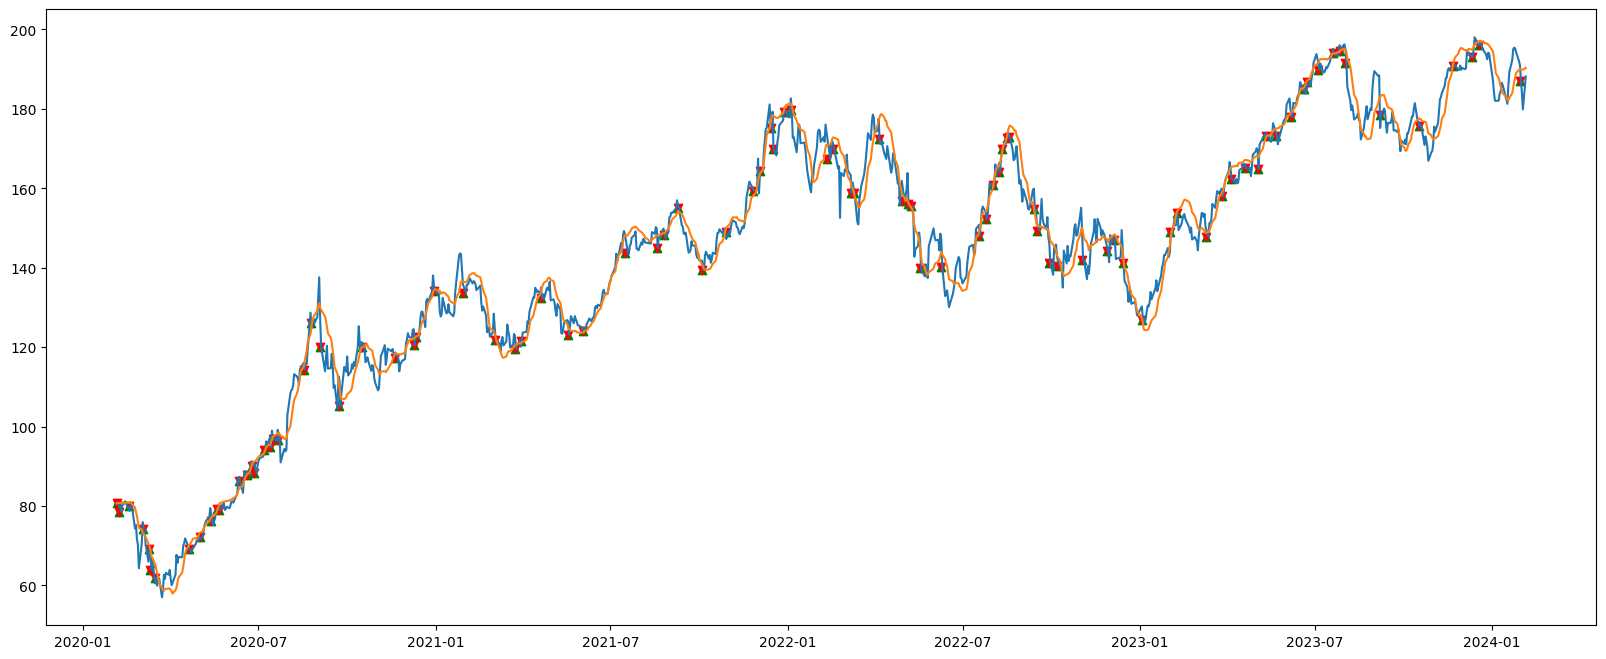

In [ ]:
plt.figure(figsize=(20,8))
plt.plot(all_df[['Open','LSMA']])# v r buying on next day open price]
plt.scatter(buydates,all_df.loc[buydates].shifted_open,marker='^',color='green')
plt.scatter(buydates,all_df.loc[buydates].shifted_open,marker='v',color='red')
